In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Task 1: Load and Prepare Data
def load_data():

    customers = pd.read_csv('/content/Customers.csv')
    products = pd.read_csv('/content/Products.csv')
    transactions = pd.read_csv('/content/Transactions.csv')

    # Merge datasets
    data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

    # Rename columns for clarity
    data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

    return customers, products, transactions, data

--- Performing Customer Segmentation ---


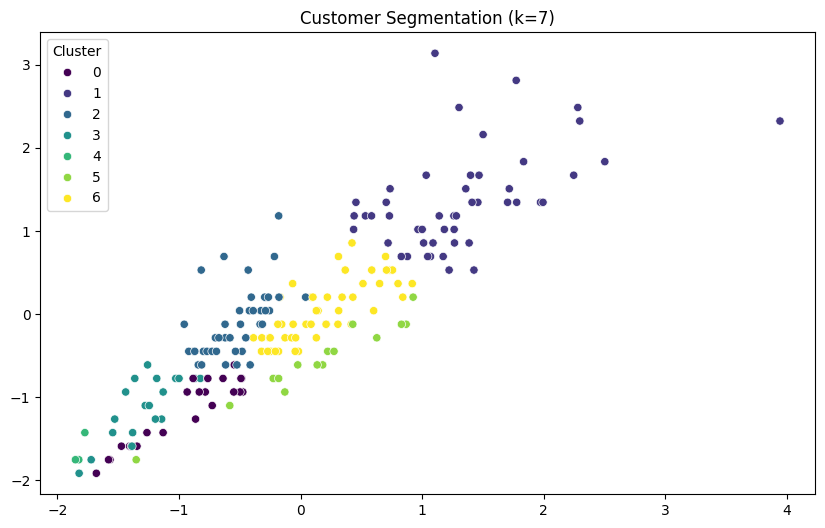

Optimal Clusters: 7
Davies-Bouldin Index: 0.7915180875483413
Silhouette Score: 0.3398
Calinski-Harabasz Index: 117.5073


In [29]:
def customer_segmentation(data):

    clustering_data = data.groupby('CustomerID').agg({
        'TotalValue': 'sum',
        'Quantity': 'sum',
        'ProductPrice': 'mean'
    }).reset_index()


    scaler = StandardScaler()
    clustering_matrix = scaler.fit_transform(clustering_data[['TotalValue', 'Quantity', 'ProductPrice']])


    db_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=1000).fit(clustering_matrix)
        db_scores.append(davies_bouldin_score(clustering_matrix, kmeans.labels_))

    optimal_k = np.argmin(db_scores) + 2



    # Fit optimal KMeans
    kmeans = KMeans(n_clusters=optimal_k, random_state=1000).fit(clustering_matrix)

    clustering_data['Cluster'] = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_matrix, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(clustering_matrix, kmeans.labels_)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=clustering_matrix[:, 0], y=clustering_matrix[:, 1], hue=clustering_data['Cluster'], palette='viridis')
    plt.title(f'Customer Segmentation (k={optimal_k})')
    plt.show()

    print(f"Optimal Clusters: {optimal_k}")
    print(f"Davies-Bouldin Index: {min(db_scores)}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    clustering_data.to_csv('Customer_Segmentation.csv', index=False)

# Main Script
if __name__ == "__main__":
    customers, products, transactions, data = load_data()


    print("--- Performing Customer Segmentation ---")
    customer_segmentation(data)

